<a href="https://colab.research.google.com/github/SMRayeed/Forage-Tasks/blob/main/British%20Airways/Review%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Task 0 : Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Data Loading

In [3]:
file_loc = '/content/drive/MyDrive/Forage-Works/British Airways/'
df = pd.read_csv(file_loc+'customer_booking.csv', encoding='latin1')

In [4]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Column Details :

    num_passengers = number of passengers travelling
    sales_channel = sales channel booking was made on
    trip_type = trip Type (Round Trip, One Way, Circle Trip)
    purchase_lead = number of days between travel date and booking date
    length_of_stay = number of days spent at destination
    flight_hour = hour of flight departure
    flight_day = day of week of flight departure
    route = origin -> destination flight route
    booking_origin = country from where booking was made
    wants_extra_baggage = if the customer wanted extra baggage in the booking
    wants_preferred_seat = if the customer wanted a preferred seat in the booking
    wants_in_flight_meals = if the customer wanted in-flight meals in the booking
    flight_duration = total duration of flight (in hours)
    booking_complete = flag indicating if the customer completed the booking

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
df_copy = df.copy()

#### Pre-processing

Null Value Check

In [8]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Columns with type : Object

    sales_channel          50000 non-null  object
    trip_type              50000 non-null  object
    flight_day             50000 non-null  object
    route                  50000 non-null  object
    booking_origin         50000 non-null  object  

In [10]:
cat = df.select_dtypes(include="object")

In [11]:
cat.head(5)

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


columns with numerical values : int and float

In [12]:
num = df.select_dtypes(include=["int64", "float64"])

In [13]:
num.head(5)

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


encoding

In [14]:
cat_col = cat.columns.tolist()

In [15]:
cat_col

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [16]:
for value in cat_col:
    cat =pd.get_dummies(cat, columns=[value],drop_first=True)

In [17]:
cat.head(5)

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Lets find out the outliers

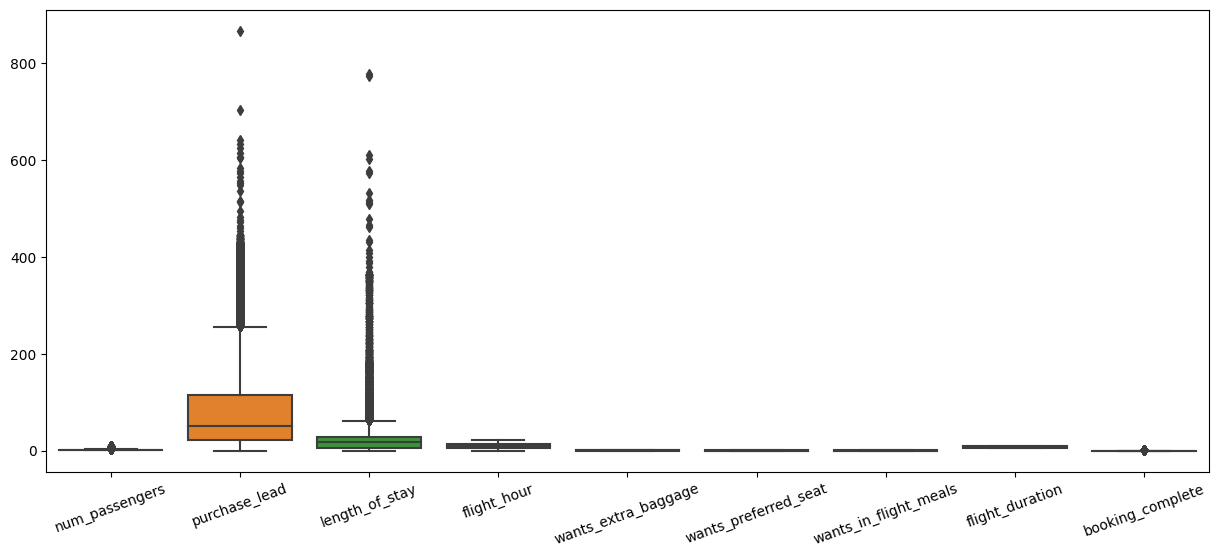

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(data = num)
plt.xticks(rotation=20)
plt.show()

Replace Them

In [19]:
def replace_outliers(df, features):

  for feature in features:
      Q1 = df[feature].quantile(0.25)
      Q3 = df[feature].quantile(0.75)
      IQR = Q3 - Q1

      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR

      median = df[feature].median()

      df[feature] = np.where(df[feature]< lower_limit, median,df[feature])
      df[feature] = np.where(df[feature]> upper_limit, median,df[feature])

  return df

In [20]:
num_col = num.columns.tolist()

In [21]:
num_col.remove('booking_complete')

In [22]:
print(num_col)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']


In [23]:
num = replace_outliers(num, num_col)

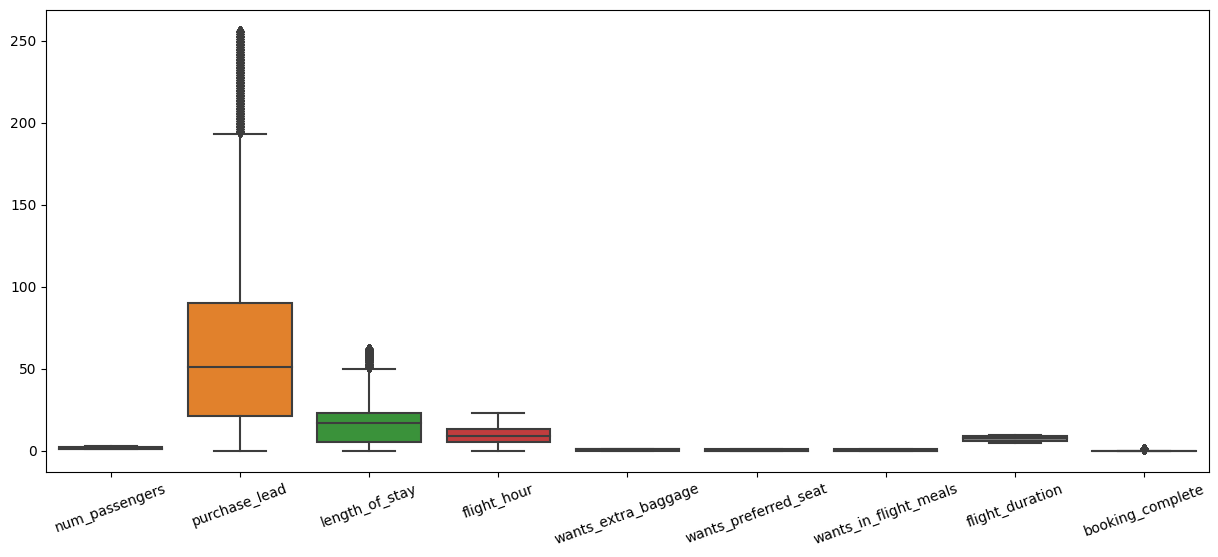

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(data = num)
plt.xticks(rotation=20)
plt.show()

Better!

Lets concatenate the columns

In [25]:
df = pd.concat([cat,num], axis =1)

In [26]:
df.head(5)

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,1,0,0,0,0,0,...,0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,0,0,1,0,0,0,0,0,1,0,...,0,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,0,0,1,0,0,0,0,0,1,0,...,0,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [27]:
df_filtered = df[df['booking_complete'] == 1]


In [28]:
df_filtered

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,0,0,1,1,0,0,0,0,0,0,...,0,1.0,15.0,31.0,17.0,0.0,0.0,0.0,8.83,1
86,0,0,1,1,0,0,0,0,0,0,...,0,1.0,156.0,19.0,14.0,1.0,0.0,0.0,8.83,1
94,0,0,1,0,0,0,0,1,0,0,...,0,1.0,181.0,17.0,2.0,1.0,0.0,1.0,8.83,1
109,1,0,1,0,0,0,0,1,0,0,...,0,1.0,127.0,17.0,16.0,1.0,0.0,1.0,8.83,1
122,0,0,1,0,0,0,0,1,0,0,...,0,1.0,42.0,17.0,14.0,0.0,0.0,0.0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,0,0,1,0,0,0,0,0,1,0,...,0,1.0,33.0,6.0,6.0,1.0,1.0,0.0,4.67,1
49977,0,0,1,0,0,0,0,1,0,0,...,0,2.0,15.0,6.0,16.0,1.0,1.0,1.0,4.67,1
49980,0,0,1,0,0,0,0,1,0,0,...,0,1.0,242.0,6.0,9.0,1.0,0.0,1.0,5.00,1
49984,0,0,1,0,0,0,0,0,1,0,...,0,2.0,7.0,6.0,4.0,0.0,0.0,0.0,5.62,1


In [29]:
target_col = "booking_complete"

In [30]:
features = df.drop(columns=[target_col])
label = df[target_col]

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [33]:
features_df = pd.DataFrame(features_scaled)

In [34]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.199219,0.306452,0.304348,1.0,0.0,0.0,0.175983
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.437500,0.322581,0.130435,0.0,0.0,0.0,0.175983
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.5,0.949219,0.354839,0.739130,1.0,1.0,0.0,0.175983
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.375000,0.500000,0.173913,0.0,0.0,1.0,0.175983
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.5,0.265625,0.354839,0.652174,1.0,0.0,1.0,0.175983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.105469,0.096774,0.391304,1.0,0.0,1.0,0.196687
49996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.433594,0.096774,0.173913,0.0,0.0,0.0,0.196687
49997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.093750,0.096774,0.956522,0.0,0.0,1.0,0.196687
49998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.058594,0.096774,0.478261,1.0,0.0,1.0,0.196687


In [35]:
label.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [36]:
print(features_scaled.shape)
print(label.shape)

(50000, 918)
(50000,)


In [37]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [38]:
smote = SMOTE()
features_smote, label_smote = smote.fit_resample(features_df, label)

In [39]:
features_smote.head(5)

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.199219,0.306452,0.304348,1.0,0.0,0.0,0.175983
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.437500,0.322581,0.130435,0.0,0.0,0.0,0.175983
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.5,0.949219,0.354839,0.739130,1.0,1.0,0.0,0.175983
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.375000,0.500000,0.173913,0.0,0.0,1.0,0.175983
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.5,0.265625,0.354839,0.652174,1.0,0.0,1.0,0.175983


In [40]:
label_smote.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

#### EDA

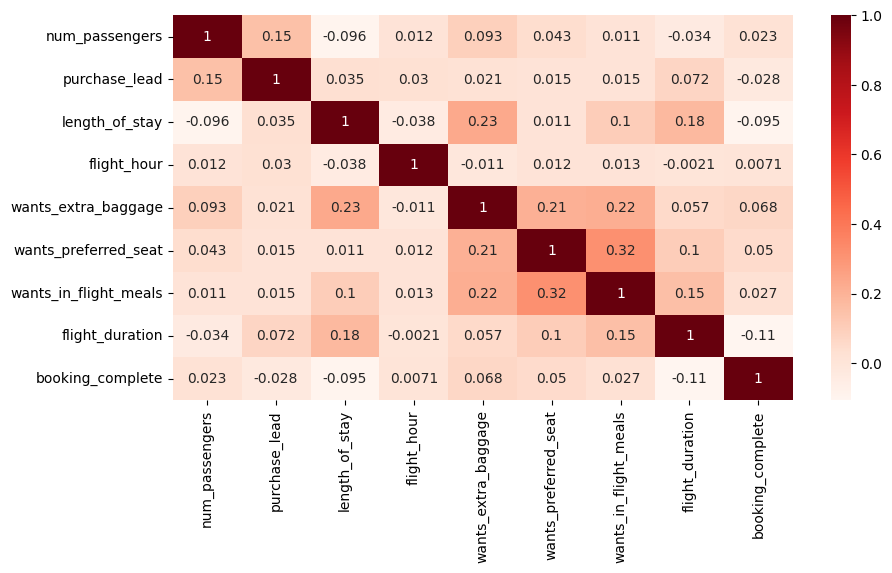

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(num.corr() , annot=True, cmap="Reds")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Train-test Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(features_smote, label_smote, test_size=0.20, random_state=45)

#### Classification : Random Forest

In [44]:
randforest = RandomForestClassifier()
randforest.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = randforest.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_metrics(y_true, y_pred, class_labels=None):

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate metrics
    tp, fp, fn, tn = cm.ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Display metrics
    print("===========================")
    print("          RESULTS          ")
    print("===========================")
    print(f"True Positives -----> {tp}")
    print(f"True Negatives -----> {tn}")
    print(f"False Positives ----> {fp}")
    print(f"False Negatives ----> {fn}")
    print(f"Accuracy -----------> {accuracy*100:.2f}")
    print(f"Precision ----------> {precision*100:.2f}")
    print(f"Recall -------------> {recall*100:.2f}")
    print(f"F1 Score -----------> {f1*100:.2f}")

    # Return metrics as a dictionary
    metrics = {
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    return metrics

In [47]:
metrics = calculate_metrics(y_test, y_pred, class_labels=['Class 0', 'Class 1'])

          RESULTS          
True Positives -----> 7960
True Negatives -----> 7728
False Positives ----> 583
False Negatives ----> 738
Accuracy -----------> 92.23
Precision ----------> 92.99
Recall -------------> 91.28
F1 Score -----------> 92.13


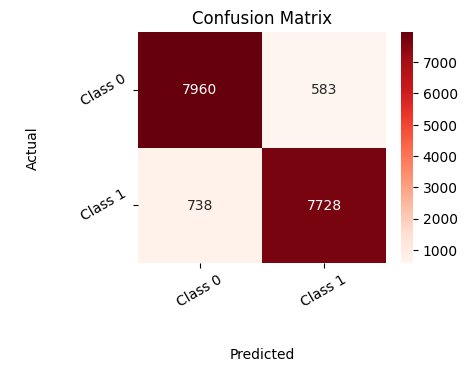

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('\n\nPredicted\n')
plt.ylabel('\nActual\n\n')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Confusion Matrix')
plt.show()